
  # HDip in Science in Data Analytics for Business (FT) 
## Machine Learning for Business
### CA1 : Machine Learning – Marketing and Sales Report 





#### Fabiane dos Santos Teixeira (2021225)                               
#### Nuno Alfredo Ribeiro Teixeira de Almeida (2021310)            
#### Valesca Soledad Bravo Bravo (2021235)
#### Thiago Medeiros de Souza (2019410)

## Library

In [1]:
#!pip install tensorflow
#!pip install fuzzy-c-means
#pip install numpy
#pip install pandas
#pip install seaborn
#pip install matplotlib
#pip install sklearn
#!pip install --upgrade numpy
#!pip install --upgrade pandas
#!pip install --upgrade scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler #UPDATE FEATURES AT THE SAME SCALE
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans  # MARKET SEGMENTATION
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from fcmeans import FCM
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import davies_bouldin_score
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier

## Content

- [I.-Exploratory Data Analysis (EDA)](#I.-Exploratory-Data-Analysis-(EDA))
 - [I.1.-Missing Values](#I.1.-Missing-Values)
 - [I.2.-Statistical plots](#I.2.-Statistical-plots)
 - [I.3.-Scaling](#I.3.-Scaling)
- [II.-Determining the number of clusters](#II.-Determining-the-number-of-clusters)
 - [II.1.-Autoencoders](#II.1.-Autoencoders)
 - [II.2.-Elbow method](#II.2.-Elbow-method)
 - [II.3.-Silhouette Coefficient](#II.3.-Silhouette-Coefficient)
 - [II.4.-K-Means Clustering](#II.4.-K-Means-Clustering)
 - [II.5.-Clustering based on K-Means](#II.5.-Clustering-based-on-K-Means) 
 - [II.6.-Table Of K-Means Clustering](#II.6.-Table-Of-K-Means-Clustering)
 - [II.7.-Principal component analysis (PCA)](#I.2.-Principal-component-analysis-(PCA))
- [III.-Clustering Algorithms](#III.-Clustering-Algorithms)
 - [III.1.-Score Table](#III.1.-Score-Table)
 - [III.2.-Birch Clustering](#III.3.-Birch-Clustering)
 - [III.3.-Clustering based on Birch](#II.5.-Clustering-based-on-Birch) 
 - [III.4.-Table Of Birch Clustering](#II.6.-Table-Of-Clustering)

## I.-Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv('Marketing_data.csv')

In [4]:
#checking size of the dataframe
df.shape

(8950, 18)

In [5]:
#seeing the first 5 rows
df.head() 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
#printing summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
#looking at the five-number summary  of Statistic
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### I.1.-Missing Values

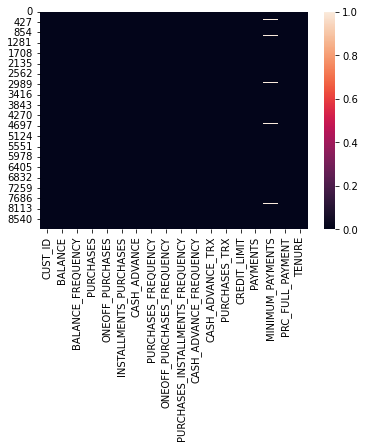

In [8]:
# Visualization of the missing values.
sns.heatmap(df.isnull());

In [9]:
# Checking missing values.
df.isnull().sum()  

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Checking mean of the column with missing Values= 'MINIMUM_PAYMENTS'
df['MINIMUM_PAYMENTS'].mean() 

864.2065423050828

In [11]:
# Localizing the missing values in the column 'MINIMUM_PAYMENTS' and overwriting the mean of the column
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [12]:
#Checking the mean of the column with missing Values= 'CREDIT_LIMIT'
df['CREDIT_LIMIT'].mean()

4494.449450364621

In [13]:
# Localizing the missing values in the column 'CREDIT_LIMIT and overwriting the mean of the column
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [14]:
# Checking missing values after the overwriting using mean
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

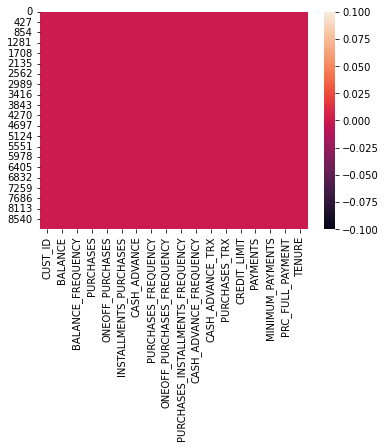

In [15]:
# Visualization of the missing values after the overwriting using mean
sns.heatmap(df.isnull());

In [16]:
## Checking duplicated information
df.duplicated().sum()

0

In [17]:
#dropping 'CUST_ID'columns
df.drop('CUST_ID', axis = 1, inplace = True)

In [18]:
#looking at first 5 rows  after dropping ID column
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
#looking at the columns
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [20]:
#It has 17 column
len(df.columns)

17

### I.2.-Statistical plots

mu=1564.4748276781006, sigma=2081.415589510965


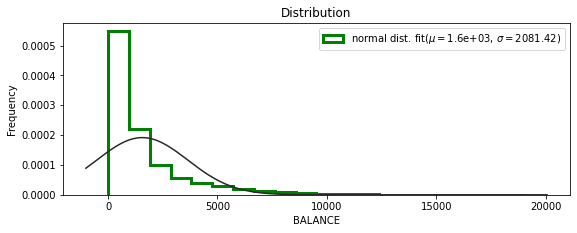

mu=0.8772707255865921, sigma=0.23689076745457388


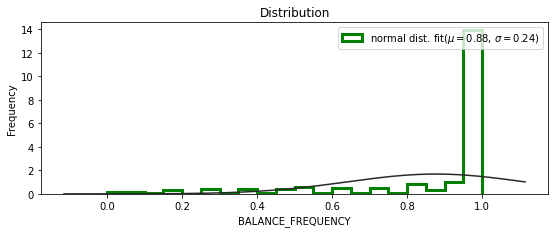

mu=1003.2048335195531, sigma=2136.5154134668696


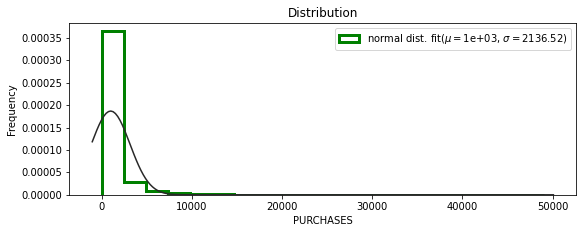

mu=592.4373709497207, sigma=1659.7951836788382


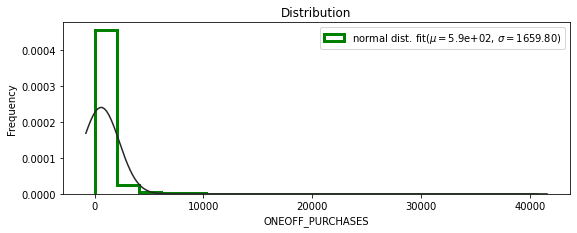

mu=411.0676446927374, sigma=904.2875920816706


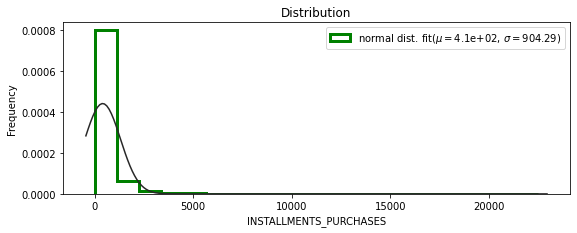

mu=978.8711124654749, sigma=2097.046713377317


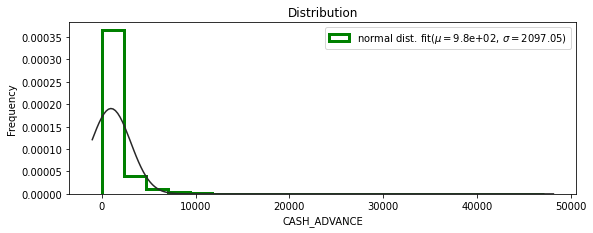

mu=0.49035054837988823, sigma=0.40134832379588636


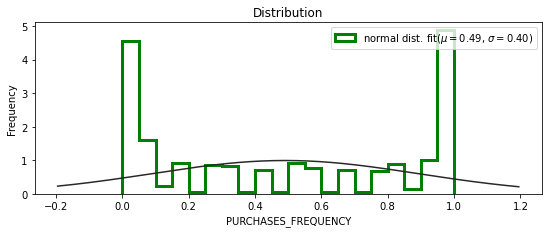

mu=0.202457683575419, sigma=0.2983193978998558


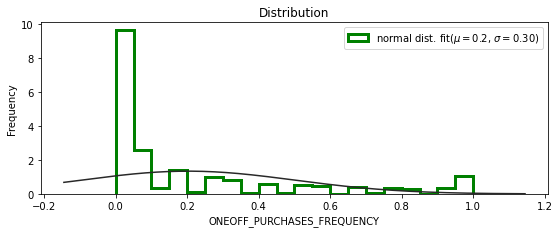

mu=0.3644373415642458, sigma=0.39742557533858297


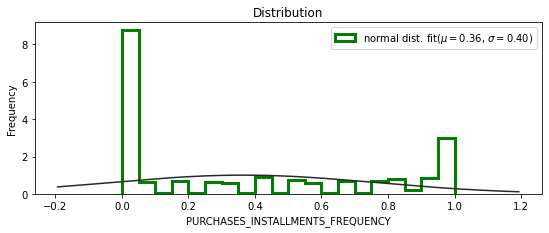

mu=0.13514420033519556, sigma=0.2001102078693716


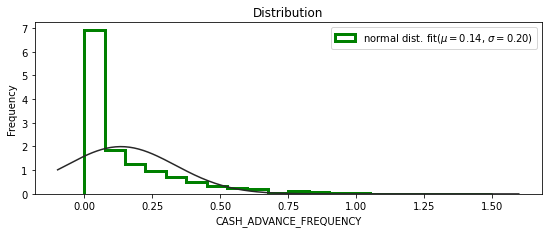

mu=3.2488268156424582, sigma=6.824265468334133


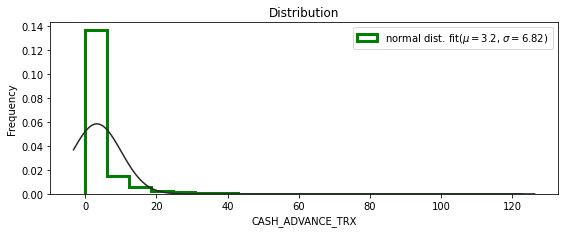

mu=14.709832402234637, sigma=24.856260375611193


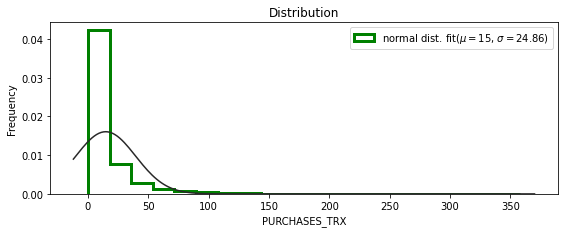

mu=4494.449450364621, sigma=3638.4091311930206


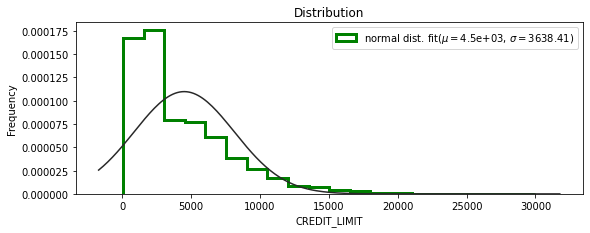

mu=1733.1438520248046, sigma=2894.9020169811592


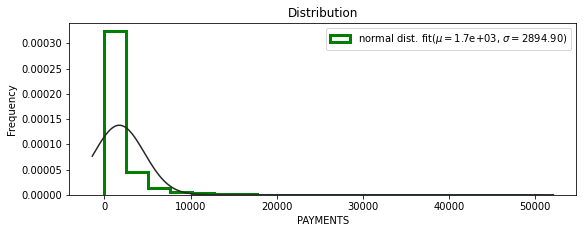

mu=864.2065423050827, sigma=2330.45781710361


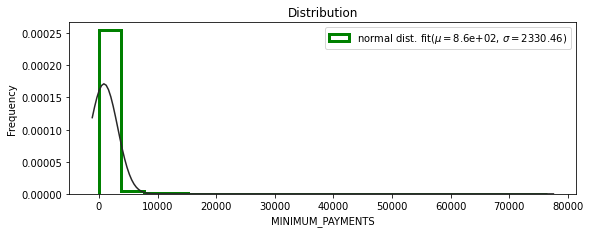

mu=0.15371464849162012, sigma=0.2924828550401881


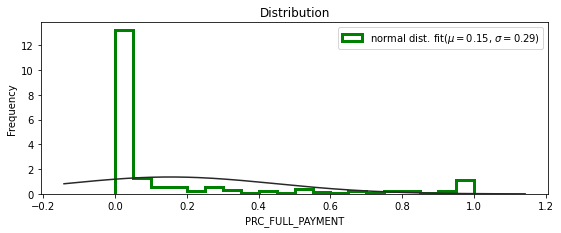

In [21]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
numerical= df.select_dtypes(include=['int64','float64']).columns


for i in range(len(df.columns)-1):
    plt.figure(figsize=(20,60))
    plt.subplot(16, 2, i+1)
    ax= sns.distplot(df[df.columns[i]],fit=stats.norm,  bins=20, kde=False, kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
    # Get the fitted parameters used by sns
    (mu, sigma) = stats.norm.fit(df[df.columns[i]])
    print("mu={0}, sigma={1}".format(mu, sigma)) 
    
     # Legend and labels 
    plt.ylabel(i)
    plt.title('Distribution')
    plt.legend(["normal dist. fit($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
    plt.ylabel('Frequency')
    
   
    plt.show() 


<AxesSubplot:>

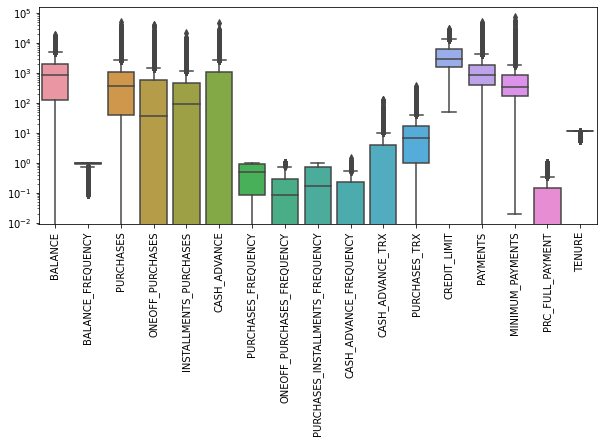

In [22]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=df)

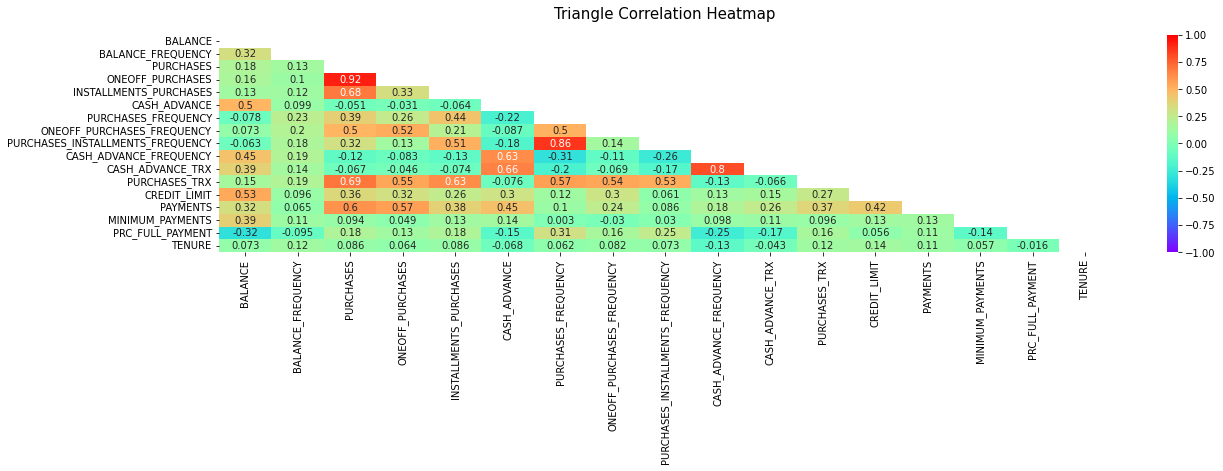

In [23]:
# checking the Pearson correlation
from warnings import filterwarnings #Avoiding warning messages
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

plt.figure(figsize = (20,4))#setting size of figure

#creating a triangle mask with Pearson Correlation
mask = np.triu(np.ones_like(df.corr(method = "pearson"), dtype=np.bool))

#creating a Heatmap, with Pearson Correlation And adding the triangle mask
heatmap= sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot = True, cmap="rainbow")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':15}, pad=16);#setting title
heatmap.tick_params(labelsize=10)# label size
plt.show()

### I.3.-Scaling

In [24]:
#The difference in scale is to big. We need to use a scaler to put on the same scaler.
min(df['BALANCE']), max(df['BALANCE']) 

(0.0, 19043.13856)

In [25]:
#Let's use the MinMax Scaler condering the min and Máx values to change to the same pattern.
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [26]:
#looking at the type information of both after and before scaling
type(df_scaled), type(df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [27]:
#Checking the array after scaling
min(df_scaled[0]), max(df_scaled[0])#Checking the array after scaling

(0.0, 1.0)

In [28]:
df_scaled

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

## II.-Determining the number of clusters

### II.1.-Autoencoders

In [29]:
#Using Auto encoders 
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [30]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [31]:
# encoder
encoder = Model(input_df, encoded)

In [32]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [33]:
autoencoder.fit(df_scaled, df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 10s 33ms/step - loss: 0.0162
Epoch 2/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0082
Epoch 3/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0072
Epoch 4/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0064
Epoch 5/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0063
Epoch 6/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0060
Epoch 7/50
280/280 [==============================] - 9s 30ms/step - loss: 0.0058
Epoch 8/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0056
Epoch 9/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0055
Epoch 10/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0052
Epoch 11/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0050
Epoch 12/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0050
Epoch 13/50


In [34]:
df_scaled.shape

(8950, 17)

In [35]:
df_ann = encoder.predict(df_scaled)
df_ann.shape

(8950, 10)

### II.2.-Elbow Method

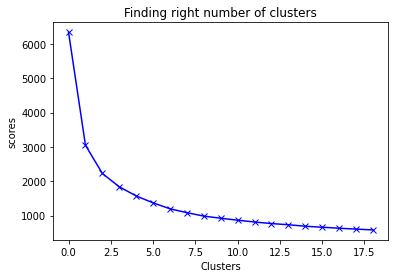

In [36]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df_ann) #we must use the dataset after the autoencoder to find the correCT number of clusters
    #kmeans.fit(df_scaled)
    scores_2.append(kmeans.inertia_)

    

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

In [37]:
distortions = []# the average of the squared distances 
inertias = []#sum of squared distances of samples to their closest cluster center.
map1 = {}
map2 = {}
K= range(1, 20)
for i in K:
    # Building and fitting the model
    Model = KMeans(n_clusters=i)
    Model.fit(df_ann)
    label = Model.labels_
 
    distortions.append(sum(np.min(cdist(df_ann, Model.cluster_centers_,
                                        'euclidean'), axis=1)) / df_ann.shape[0])
    inertias.append(Model.inertia_)
 
    map1[i] = sum(np.min(cdist(df_ann, Model.cluster_centers_,
                                   'euclidean'), axis=1)) / df_ann.shape[0]
    map2[i] = Model.inertia_

In [38]:
for key, val in map1.items():
    print(f'{key} : {val}')

1 : 0.6908077944157858
2 : 0.4865840496155742
3 : 0.3908618322427068
4 : 0.3598502168339475
5 : 0.335335914465132
6 : 0.3139101027825853
7 : 0.29919994709321096
8 : 0.27197535059580596
9 : 0.26192824755298816
10 : 0.2476103327702396
11 : 0.24335841998609967
12 : 0.23344063095149833
13 : 0.2287473391475714
14 : 0.22230077019599467
15 : 0.22026190911133664
16 : 0.21686044445927552
17 : 0.2150030691133347
18 : 0.2099754253292219
19 : 0.204900041207619


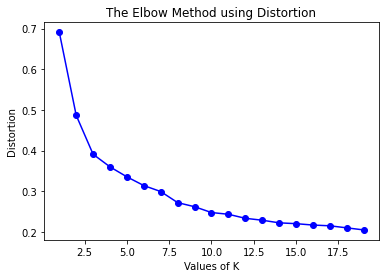

In [39]:
plt.plot(K, distortions, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [40]:
for key, val in map2.items():
    print(f'{key} : {val}')

1 : 6342.68505859375
2 : 3050.2451171875
3 : 2226.40625
4 : 1838.6082763671875
5 : 1572.206298828125
6 : 1370.596435546875
7 : 1197.052978515625
8 : 1083.6748046875
9 : 983.66162109375
10 : 922.4968872070312
11 : 865.2562866210938
12 : 813.4699096679688
13 : 765.7332763671875
14 : 730.812744140625
15 : 686.9398193359375
16 : 663.2535400390625
17 : 628.37060546875
18 : 602.1002197265625
19 : 578.9874877929688


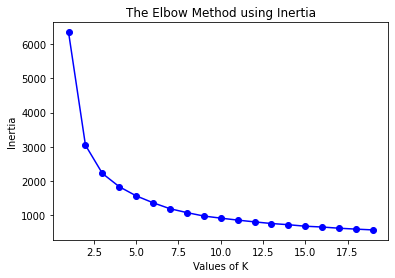

In [41]:
plt.plot(K, inertias, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

### II.3.-Silhouette Coefficient

Silhouette analysis can be used to study the separation distance between the resulting clusters. This measure has a range of [-1, 1].

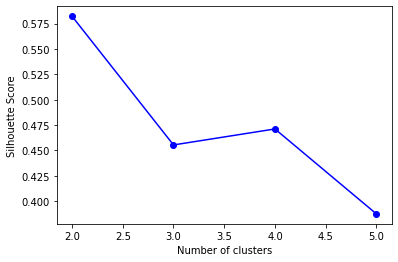

In [42]:
silhouette_scores = [] 

for k in range(2, 6):
    silhouette_scores.append( 
        silhouette_score(df_ann, KMeans(n_clusters = k).fit_predict(df_ann)))
    # Plotting a bar graph to compare the results 
k = [2, 3, 4, 5] 
plt.plot(k, silhouette_scores, "bo-") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 

plt.show() 

### II.4.-K-Means Clustering 

In [43]:
#Using K-means Method with 4 numbers of Clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_ann)
kmeans_labels = kmeans.labels_

In [44]:
#Indicate Cluster of clientes
kmeans_labels, len(kmeans_labels)

(array([0, 0, 1, ..., 0, 0, 0]), 8950)

In [45]:
#number of entries per cluster
np.unique(kmeans_labels, return_counts=True)

(array([0, 1, 2, 3]), array([5419,  867, 1946,  718], dtype=int64))

In [46]:
#Vectors with centers
kmeans.cluster_centers_

array([[0.        , 0.        , 0.46881336, 0.        , 0.        ,
        0.26382777, 0.        , 0.        , 0.        , 0.30586118],
       [0.        , 0.        , 1.255157  , 0.        , 0.        ,
        1.0240949 , 0.        , 0.        , 0.        , 0.6599026 ],
       [0.        , 0.        , 0.31651995, 0.        , 0.        ,
        1.0919536 , 0.        , 0.        , 0.        , 0.46445337],
       [0.        , 0.        , 1.2578943 , 0.        , 0.        ,
        2.2465434 , 0.        , 0.        , 0.        , 1.0912118 ]],
      dtype=float32)

In [47]:
#Using function Concat to merge information "K-means Clusters" with the original Data.
df_cluster_ann = pd.concat([df, pd.DataFrame({'KMEANS_CLUSTER': kmeans_labels})], axis = 1)
df_cluster_ann.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


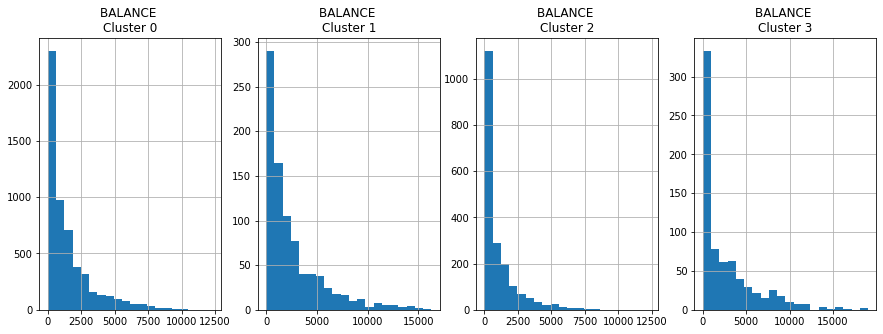

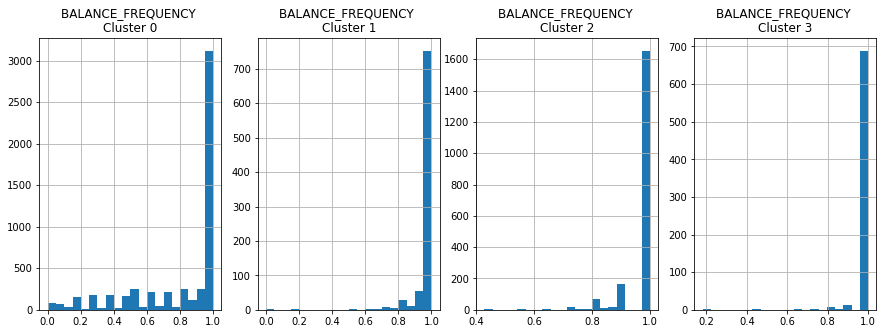

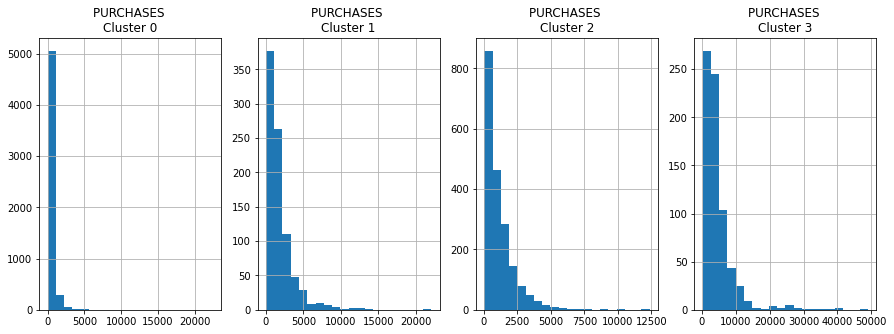

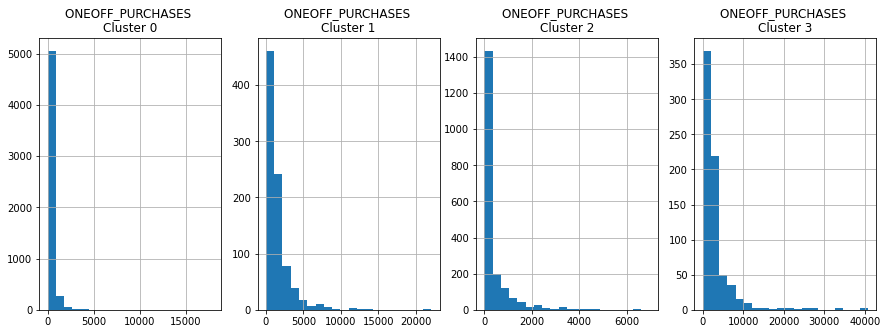

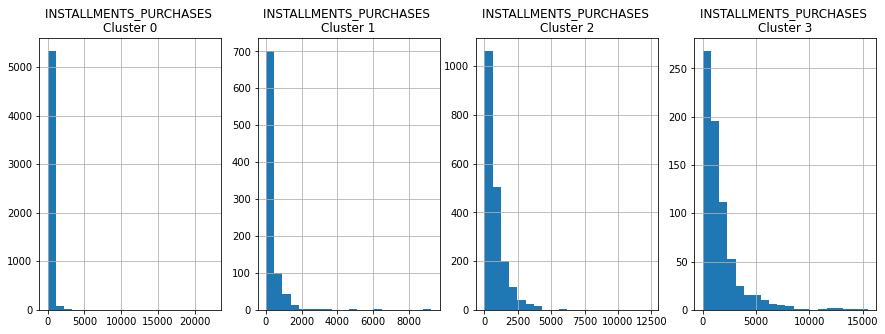

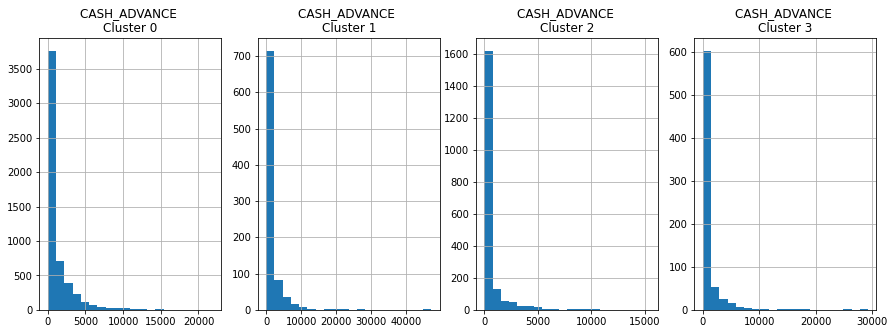

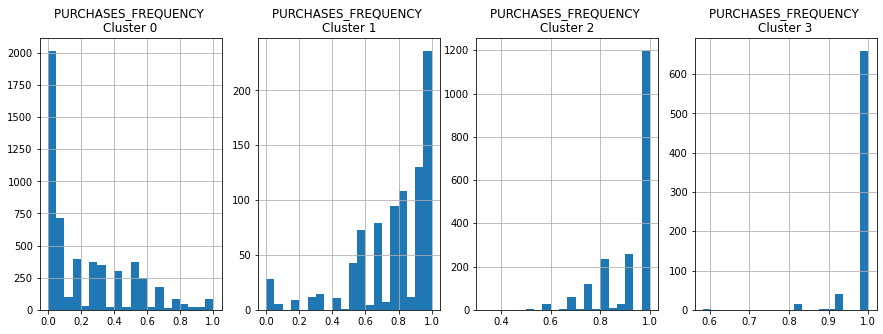

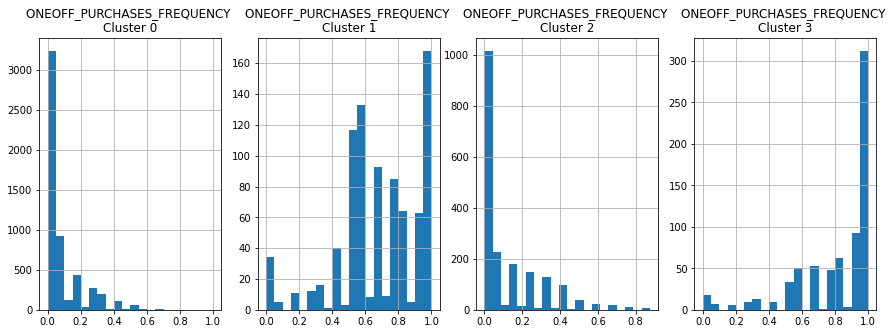

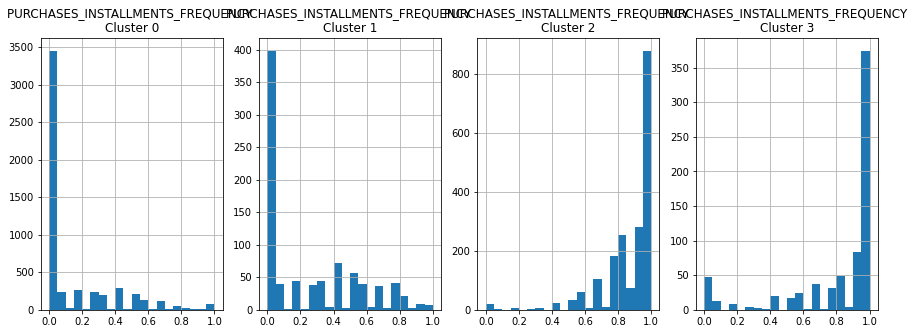

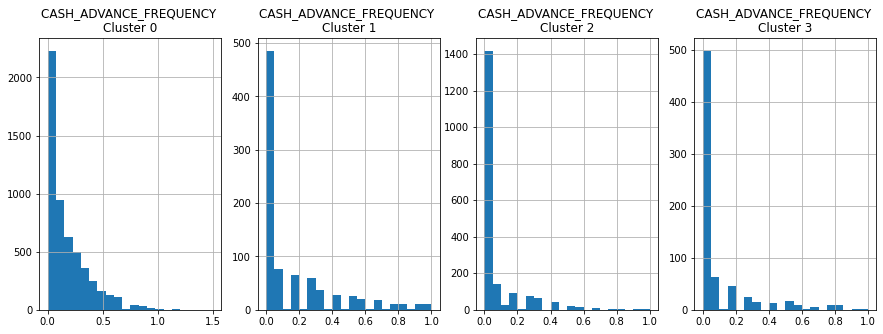

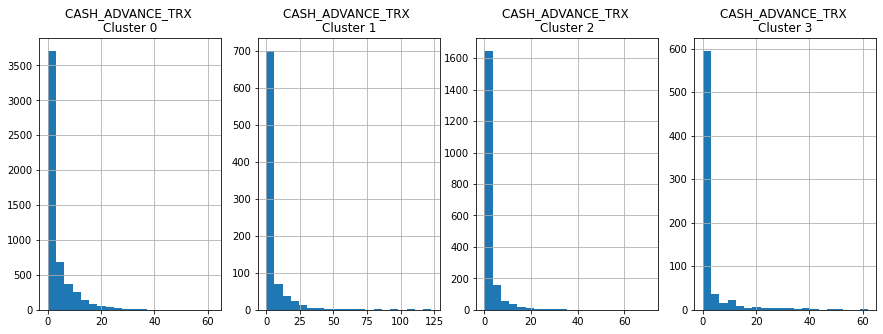

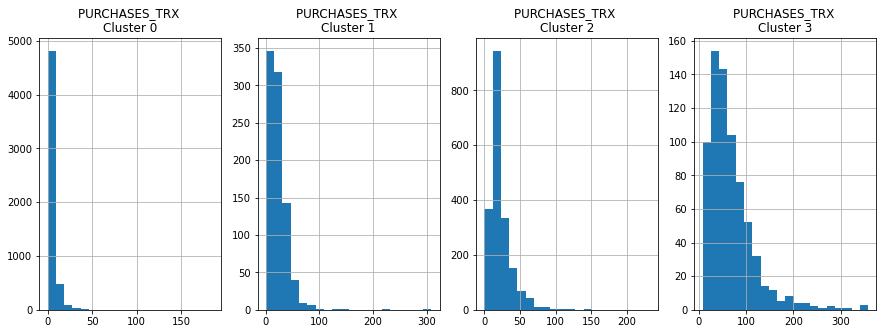

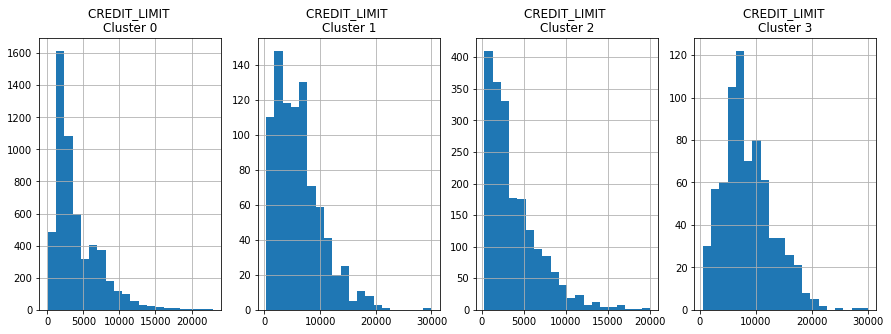

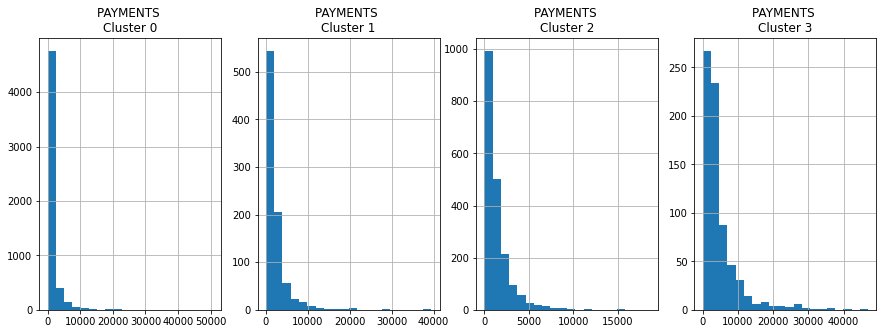

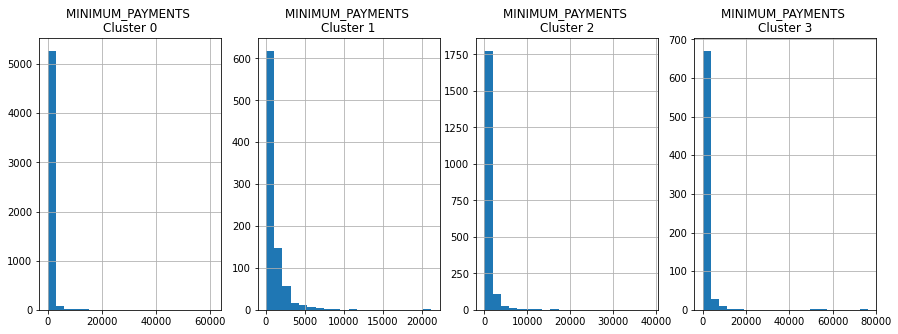

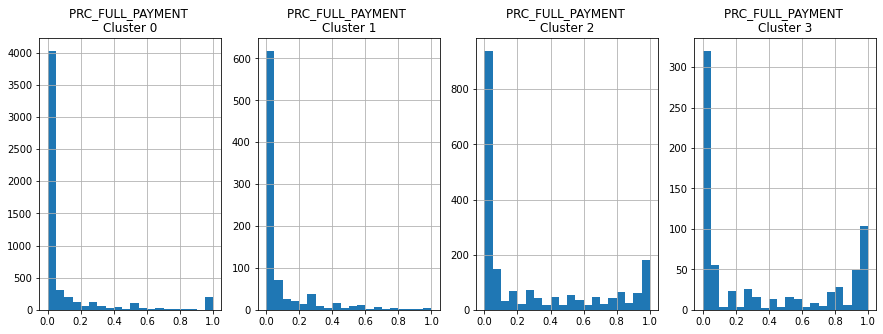

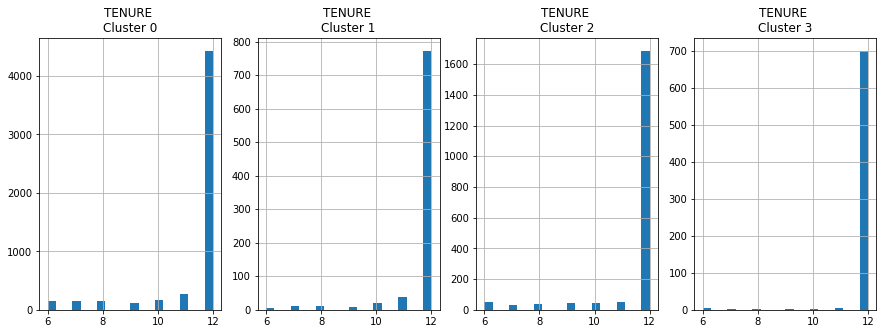

In [48]:
#graph showing every feature per cluster
for i in df.columns:
  plt.figure(figsize=(15,5))
  for j in range(4):
    plt.subplot(1, 4, j + 1) #the loop below was wrong
  #for j in range(2):
   # plt.subplot(1, 2, j + 1)
    cluster = df_cluster_ann[df_cluster_ann['KMEANS_CLUSTER'] == j] #the dataset below is wrong
    #cluster = df1_cluster[df1_cluster['KMEANS_CLUSTER'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [49]:
df_ordered = df_cluster_ann.sort_values(by = 'KMEANS_CLUSTER')
df_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
5362,1340.551352,1.000000,427.96,331.96,96.00,618.344755,0.500000,0.333333,0.416667,0.166667,4,12,1500.0,326.956073,472.486843,0.0,12,0
5360,4800.168978,1.000000,0.00,0.00,0.00,4491.730795,0.000000,0.000000,0.000000,0.272727,11,0,9000.0,1134.482984,1092.950836,0.0,11,0
5357,1879.694262,1.000000,832.67,694.73,137.94,0.000000,0.583333,0.250000,0.333333,0.000000,0,22,2000.0,873.931715,1452.265916,0.0,12,0
5356,3093.592745,1.000000,47.69,82.41,0.00,1438.951061,0.166667,0.083333,0.000000,0.583333,15,1,4100.0,4591.237633,723.343619,0.0,12,0


In [50]:
df_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_CLUSTER
4033,4252.504676,1.000000,2172.77,1491.73,681.04,0.000000,1.0,1.000000,1.000000,0.000000,0,45,11000.0,1425.671686,1217.875041,0.000000,12,3
536,3366.051663,1.000000,6344.30,4438.80,1905.50,0.000000,1.0,0.833333,0.666667,0.000000,0,54,12000.0,2890.901993,694.340138,0.083333,12,3
6640,348.342172,0.909091,11878.25,7958.96,3919.29,0.000000,1.0,1.000000,0.416667,0.000000,0,103,6000.0,11845.841240,156.683560,0.600000,12,3
550,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.0,1.000000,0.916667,0.083333,1,101,22500.0,46930.598240,2974.069421,0.250000,12,3
4598,8073.983031,1.000000,2153.11,1326.00,827.11,3037.443167,1.0,0.750000,0.916667,0.583333,28,48,9500.0,3032.171255,2764.780103,0.000000,12,3


In [51]:
df_ordered.shape

(8950, 18)

### II.5.-Clustering based on K-Means

In [52]:
Cluster1 = [0]
Cluster2 = [1]
Cluster3 = [2]
Cluster4 = [3]
GroupMarketingk1 = df_ordered[(df_ordered['KMEANS_CLUSTER'].isin(Cluster1))]
GroupMarketingk2 = df_ordered[(df_ordered['KMEANS_CLUSTER'].isin(Cluster2))]
GroupMarketingk3 = df_ordered[(df_ordered['KMEANS_CLUSTER'].isin(Cluster3))]
GroupMarketingk4 = df_ordered[(df_ordered['KMEANS_CLUSTER'].isin(Cluster4))]
a = len(GroupMarketingk1.index)
b = len(GroupMarketingk2.index)
c = len(GroupMarketingk3.index)
d = len(GroupMarketingk4.index)

In [53]:
GroupMarketingk1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
5362,1340.551352,1.000000,427.96,331.96,96.00,618.344755,0.500000,0.333333,0.416667,0.166667,4,12,1500.0,326.956073,472.486843,0.0,12,0
5360,4800.168978,1.000000,0.00,0.00,0.00,4491.730795,0.000000,0.000000,0.000000,0.272727,11,0,9000.0,1134.482984,1092.950836,0.0,11,0
5357,1879.694262,1.000000,832.67,694.73,137.94,0.000000,0.583333,0.250000,0.333333,0.000000,0,22,2000.0,873.931715,1452.265916,0.0,12,0
5356,3093.592745,1.000000,47.69,82.41,0.00,1438.951061,0.166667,0.083333,0.000000,0.583333,15,1,4100.0,4591.237633,723.343619,0.0,12,0


In [54]:
GroupMarketingk2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_CLUSTER
6127,460.566250,1.000000,864.61,864.61,0.00,0.000000,0.833333,0.833333,0.000000,0.00,0,11,3000.0,1880.266926,362.449997,0.25,12,1
6021,4348.546906,1.000000,3198.15,1966.24,1231.91,0.000000,0.909091,0.545455,0.909091,0.00,0,54,6000.0,1068.304454,1647.360238,0.00,11,1
8602,997.496745,1.000000,1629.83,1629.83,0.00,276.760257,0.583333,0.583333,0.000000,0.25,5,21,1200.0,890.611754,590.889201,0.00,12,1
5966,64.152423,0.818182,487.00,487.00,0.00,0.000000,0.666667,0.666667,0.000000,0.00,0,13,500.0,454.888506,127.731899,0.20,12,1
8923,486.661842,0.833333,1898.88,939.09,959.79,0.000000,0.833333,0.666667,0.666667,0.00,0,24,1200.0,669.039640,336.880119,0.50,6,1


In [55]:
GroupMarketingk3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_CLUSTER
2998,1201.149593,1.000000,851.21,260.45,590.76,0.0,0.833333,0.25,0.750000,0.0,0,21,3600.0,978.569968,362.836640,0.000000,12,2
7850,77.325920,1.000000,664.51,0.00,664.51,0.0,0.916667,0.00,0.833333,0.0,0,11,2500.0,623.532457,174.762624,1.000000,12,2
3004,100.037595,1.000000,414.48,0.00,414.48,0.0,1.000000,0.00,1.000000,0.0,0,12,1000.0,234.619774,144.362561,0.000000,12,2
7409,18.627266,0.888889,309.26,0.00,309.26,0.0,0.888889,0.00,0.777778,0.0,0,14,1500.0,272.654072,122.277171,0.714286,9,2
7349,1809.917132,1.000000,266.64,0.00,266.64,0.0,1.000000,0.00,1.000000,0.0,0,24,2500.0,77.991128,13916.702900,0.000000,12,2


In [56]:
GroupMarketingk4.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_CLUSTER
5544,10495.739340,1.0,5038.27,1940.88,3097.39,0.000000,1.0,0.500000,1.0,0.000000,0,108,14500.0,2564.857063,4606.755937,0.000000,12,3
3733,1565.025253,1.0,3035.98,785.60,2250.38,7003.112284,1.0,0.500000,1.0,0.666667,36,94,2500.0,13562.879260,1709.158354,0.666667,12,3
258,5570.190127,1.0,1607.88,0.00,1607.88,0.000000,1.0,0.000000,1.0,0.000000,0,84,13500.0,1583.411686,2216.638394,0.000000,12,3
5545,2182.752161,1.0,3216.97,2360.30,856.67,5594.061996,1.0,0.666667,1.0,0.583333,17,51,10000.0,7573.546529,501.711259,0.250000,12,3
261,2903.781184,1.0,3014.23,1340.34,1673.89,103.610197,1.0,0.833333,1.0,0.083333,1,93,4500.0,1350.370286,655.633916,0.000000,12,3


### II.6.-Table Of K-Means Clustering

In [57]:
Clients = ['Cluster 1','Cluster 2', 'Cluster 3','Cluster 4']
Marketing_ClientsK = [a, b, c, d ]
allResults= pd.DataFrame()
allResults['Marketing Group'] = Clients
allResults['KMEANS Clients'] = Marketing_ClientsK
allResults

,Marketing Group,KMEANS Clients
0,Cluster 1,5419
1,Cluster 2,867
2,Cluster 3,1946
3,Cluster 4,718


### II.7.-Principal component analysis (PCA)

PCA df
Original shape: (8950, 10)
Reduced shape: (8950, 3)


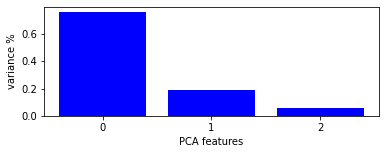

PCA Overview
Total: 3 components
------------------------------
Mean explained variance: 0.333
------------------------------
   explained variance  cumulative
1            0.760196    0.760196
2            0.185841    0.946037
3            0.053963    1.000000
------------------------------


In [58]:
# keep the first principal components of the data
print("PCA df")
pca = PCA(0.995) 
# fit PCA model 
df_pca = pca.fit_transform(df_ann)
#fit the dtaset scaled and passed for ANN  
print("Original shape: {}".format(str(df_ann.shape)))#checking shape
print("Reduced shape: {}".format(str(df_pca.shape)))#checking shape


# Plot the explained variances
plt.figure(figsize=(6, 2))#setting size
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1

df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                      index=['explained variance', 'cumulative'],
                                      columns=idx).T
plt.show()

mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance
# Print explained variance as plain text
print('PCA Overview')
print('='*30)
print("Total: {} components".format(n_components))
print('-'*30)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*30)
print(df_explained_variance.head(20))
print('-'*30)

In [59]:
#Using PCA to identify principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_pca)
principal_comp

array([[-0.5335376 , -0.01678775],
       [-0.49596262,  0.17304088],
       [ 0.8721503 ,  0.9125128 ],
       ...,
       [-0.34464532, -0.44075245],
       [-0.69218975,  0.13890588],
       [-0.74490315,  0.17967504]], dtype=float32)

In [60]:
pca_df1 = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df1.head()

,pca1,pca2
0,-0.533538,-0.016788
1,-0.495963,0.173041
2,0.872150,0.912513
3,-0.540674,-0.003578
4,-0.479983,0.083401


In [61]:
#Using function Concat to Identify clients CLusters according PCA
pca_df1 = pd.concat([pca_df1, pd.DataFrame({'KMEANS_CLUSTER': kmeans_labels})], axis = 1)
pca_df1.head()

,pca1,pca2,KMEANS_CLUSTER
0,-0.533538,-0.016788,0
1,-0.495963,0.173041,0
2,0.872150,0.912513,1
3,-0.540674,-0.003578,0
4,-0.479983,0.083401,0


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

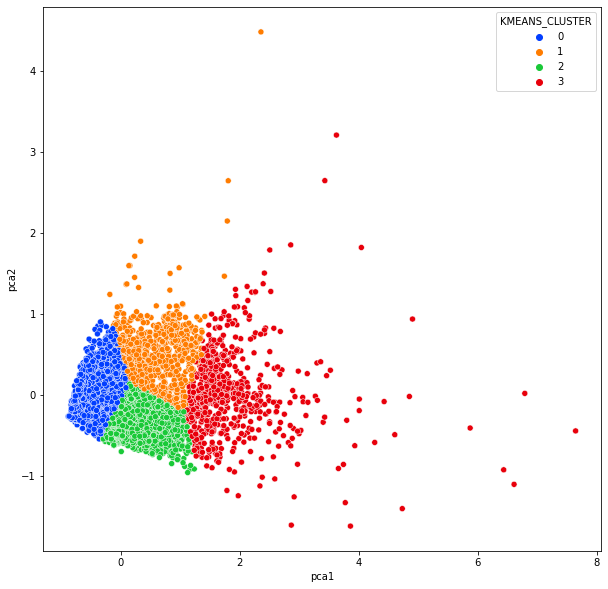

In [62]:
#Plot To visualize the Cluster distribuition
plt.figure(figsize=(10,10))
plt.legend(kmeans_labels)
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'KMEANS_CLUSTER', data = pca_df1, palette = 'bright')

## III.-Clustering Algorithms

https://scikit-learn.org/stable/modules/clustering.html#clustering

In [63]:
#Defining X and Algorithms
x= principal_comp

#creating list
models = ['KMeans', 'Agglomerative Clustering',' FCM',
          'GaussianMixture', 'Birch']
k= 4
Cluster = []
Score_Silhouette = []
Score_Calinski_Harabasz = []
Score_Davies_Bouldin = []



Silhouette Score: 0.5060323476791382


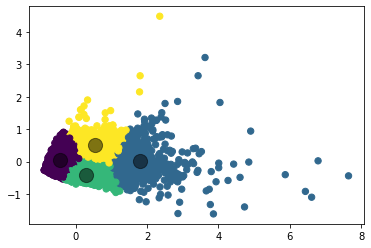

In [64]:
kmeans = KMeans(n_clusters = k, max_iter = 300, n_init = 10, random_state = 38)
y_kmeans = kmeans.fit_predict(x)
centers = kmeans.cluster_centers_
# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,1], c=y_kmeans, s=40, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


# Plotting the centroids of the clusters

# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, y_kmeans)}')

# Create an additional column in the dataframe (df) as KMeans_labels
Cluster.append(k)
Score_Silhouette.append(silhouette_score(x, y_kmeans))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, y_kmeans))
Score_Davies_Bouldin.append(davies_bouldin_score(x, y_kmeans))

Silhouette Score: 0.4859941303730011


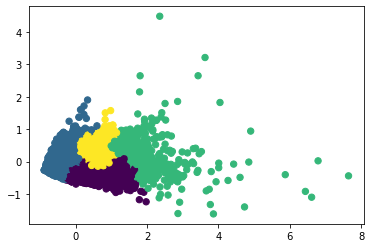

In [65]:
kmeans = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,1], c=y_kmeans, s=40, cmap='viridis')


print(f'Silhouette Score: {silhouette_score(x, y_kmeans)}')

# Create an additional column in the dataframe (df) as KMeans_labels
Cluster.append(k)
Score_Silhouette.append(silhouette_score(x, y_kmeans))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, y_kmeans))
Score_Davies_Bouldin.append(davies_bouldin_score(x, y_kmeans))

Silhouette Score: 0.4279007911682129


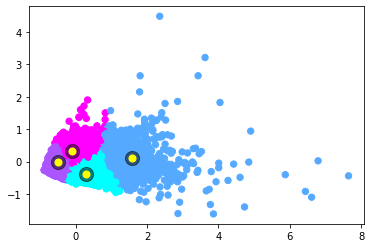

In [66]:
kmeans = FCM(n_clusters =k)
y_kmeans = kmeans.fit(x)
centers = kmeans.centers
fcm_labels = kmeans.u.argmax(axis = 1)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,1], c=fcm_labels, s=40, cmap='cool')
# Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.scatter(centers[:, 0], centers[:,1], s = 50, c = 'yellow', label = 'Centroids')

# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, fcm_labels)}')
# Create an additional column in the dataframe (df) as KMeans_labels
Cluster.append(k)
Score_Silhouette.append(silhouette_score(x, fcm_labels))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, fcm_labels))
Score_Davies_Bouldin.append(davies_bouldin_score(x, fcm_labels))

Silhouette Score: 0.44377461075782776


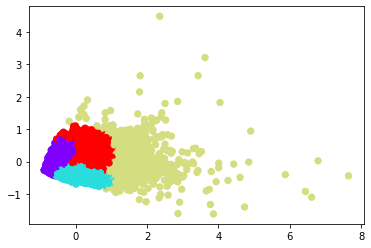

In [67]:
kmeans =  GaussianMixture(n_components=4)
y_kmeans = kmeans.fit(x)
labels= y_kmeans.predict(x)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,1],c=labels,s=40, cmap='rainbow')

# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, labels)}')

# Create an additional column in the dataframe 
Cluster.append(k)
Score_Silhouette.append(silhouette_score(x,labels))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, labels))
Score_Davies_Bouldin.append(davies_bouldin_score(x, labels))

Silhouette Score: 0.6219326257705688


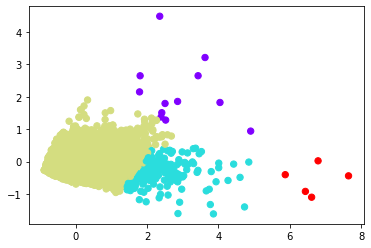

In [68]:
kmeans = Birch(n_clusters=k)
y_kmeans = kmeans.fit(x)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_,  s=40, cmap='rainbow')

# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, kmeans.labels_)}')

# Create an additional column in the dataframe (df) as KMeans_labels
Cluster.append(k)
Score_Silhouette.append(silhouette_score(x, kmeans.labels_))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, kmeans.labels_))
Score_Davies_Bouldin.append(davies_bouldin_score(x, kmeans.labels_))

### III.1.-Scores Table 

In [69]:
allResults= pd.DataFrame()
allResults['Model'] = models
allResults['N° Clusters'] = Cluster
allResults['Silhouette Score'] = Score_Silhouette
allResults['Calinski-Harabasz Score'] = Score_Calinski_Harabasz
allResults['Davies_Bouldin Score'] = Score_Davies_Bouldin
allResults

,Model,N° Clusters,Silhouette Score,Calinski-Harabasz Score,Davies_Bouldin Score
0,KMeans,4,0.506032,8950.084948,0.780988
1,Agglomerative Clustering,4,0.485994,7608.647556,0.871539
2,FCM,4,0.427901,8537.341794,0.832452
3,GaussianMixture,4,0.443775,7712.518539,0.906540
4,Birch,4,0.621933,1078.982044,0.575832


* The Silhouette Coefficient goes from -1 to 1. Scores around zero reveals overlapping clusters.
* Calinski-Harabasz index or the Variance Ratio Criterion indicates that highest score is relates to a model with better defined clusters.
* The Davies-Bouldin index evidences where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

How one can appreciete in the table Kmeans and Birch are the algoritms that performance better.

### III.2.-Birch Clustering

In [70]:
#Applying Birch method 
kmeans = Birch(n_clusters=k, threshold=0.5,
                branching_factor=50, compute_labels=True)
 
y_kmeans = kmeans.fit(df_ann)
labels_Birch = kmeans.labels_


In [71]:
labels_Birch, len(labels_Birch)

(array([2, 2, 2, ..., 2, 2, 2], dtype=int64), 8950)

In [72]:
np.unique(labels_Birch, return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([ 135,   29, 8781,    5], dtype=int64))

In [73]:
Final_cluster = pd.concat([df, pd.DataFrame({'BIRCH_CLUSTER': labels_Birch})], axis = 1)
Final_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BIRCH_CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


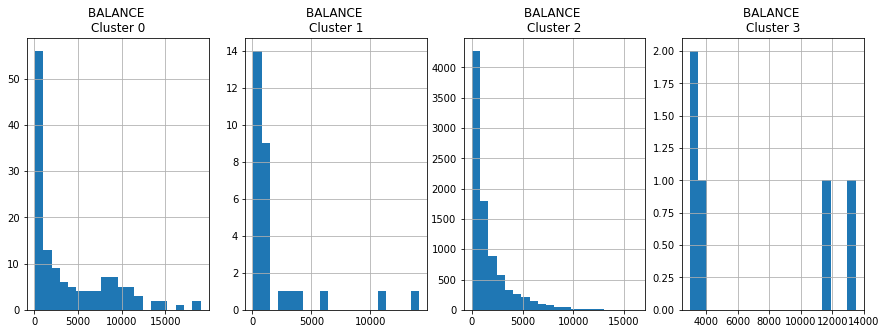

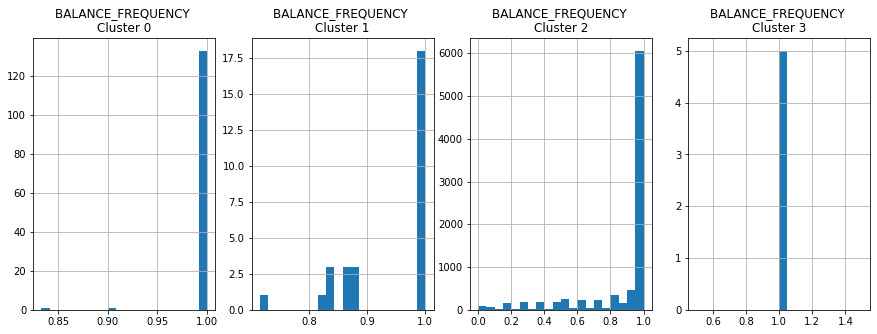

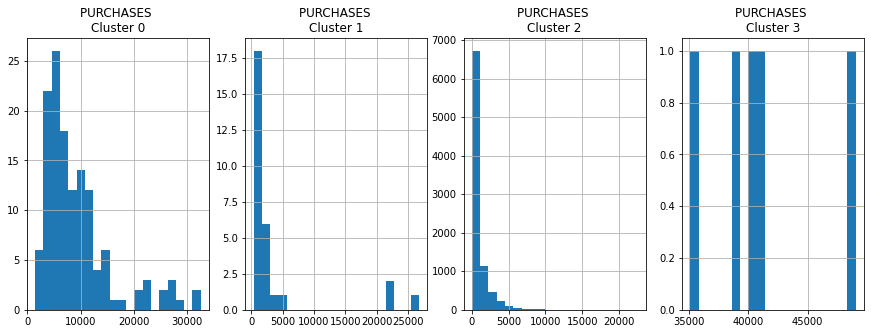

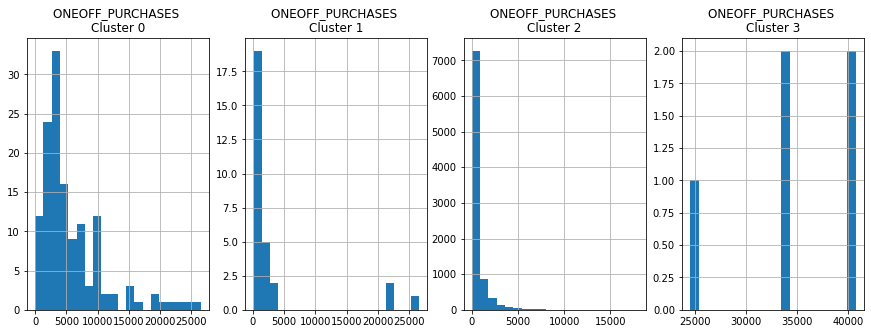

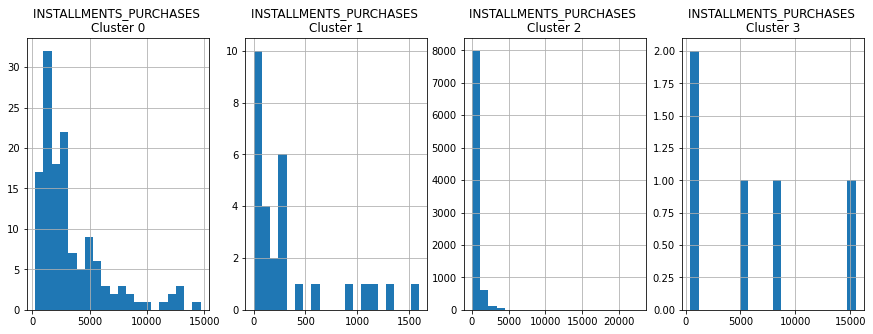

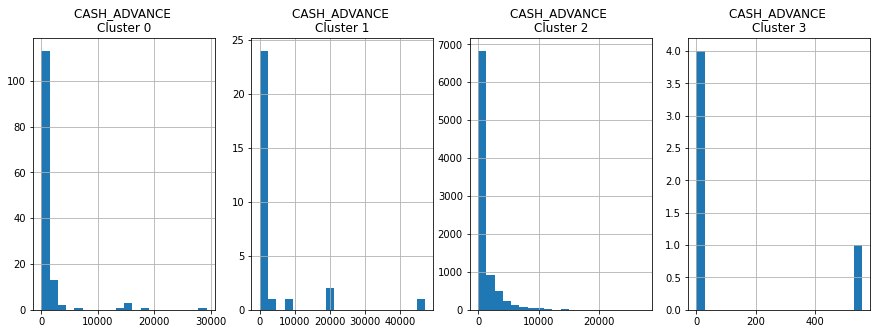

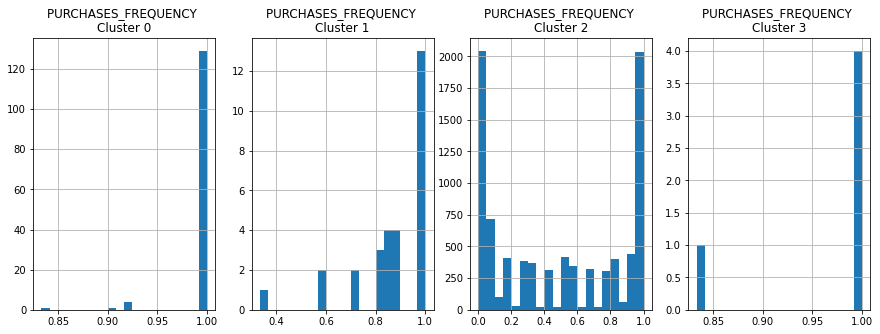

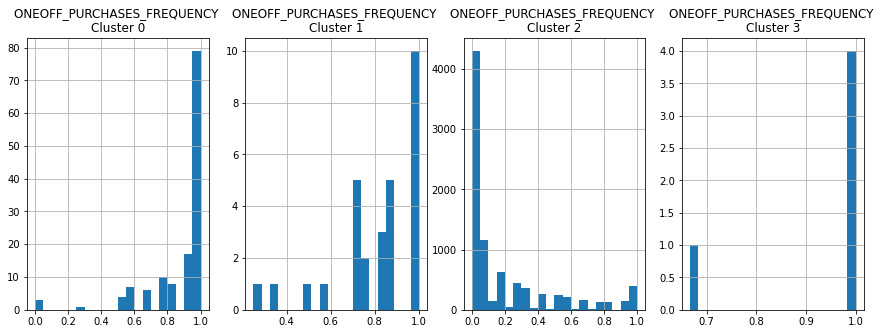

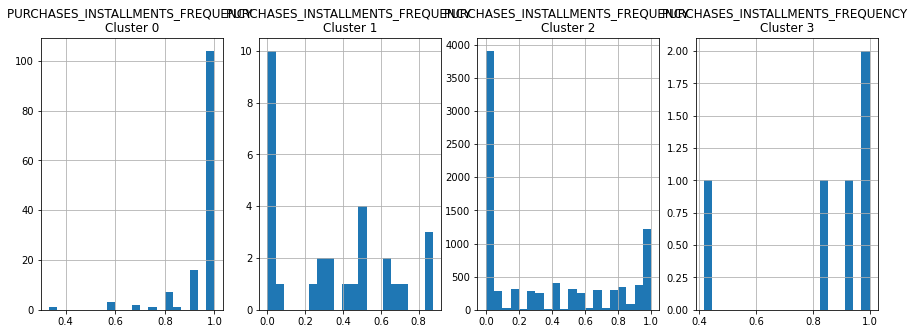

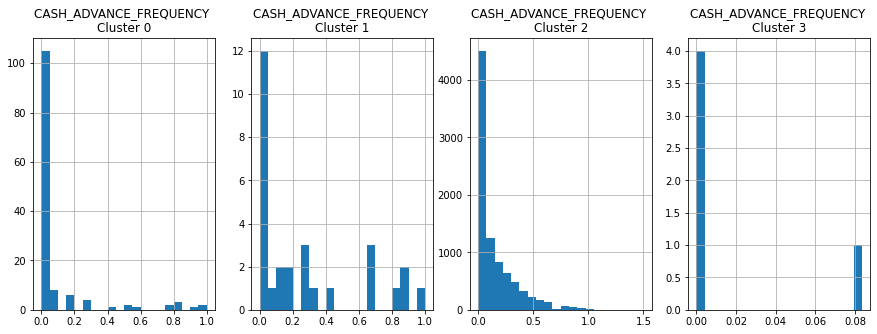

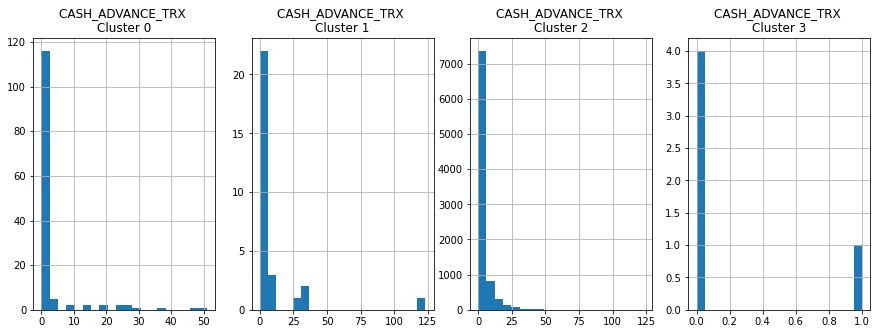

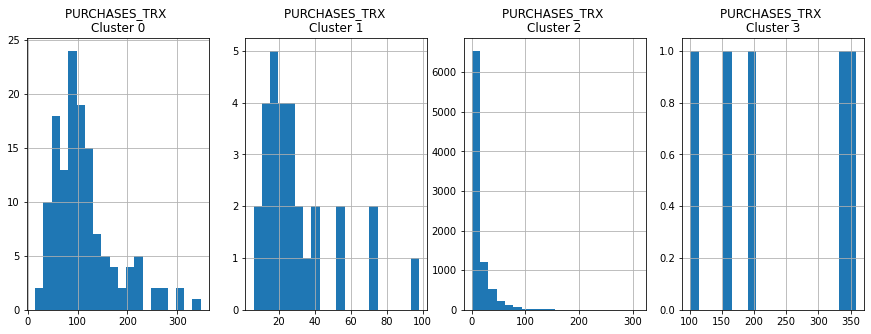

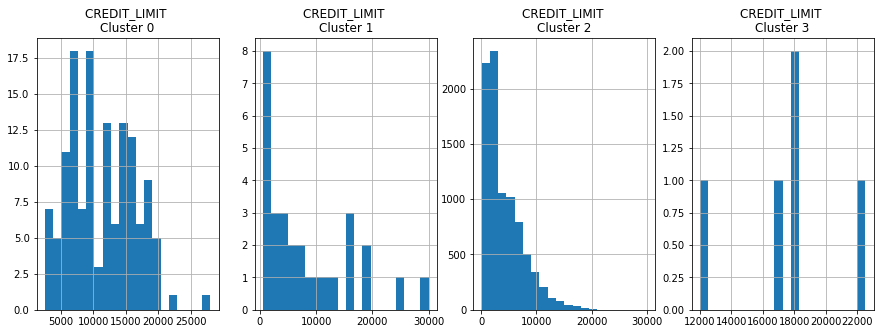

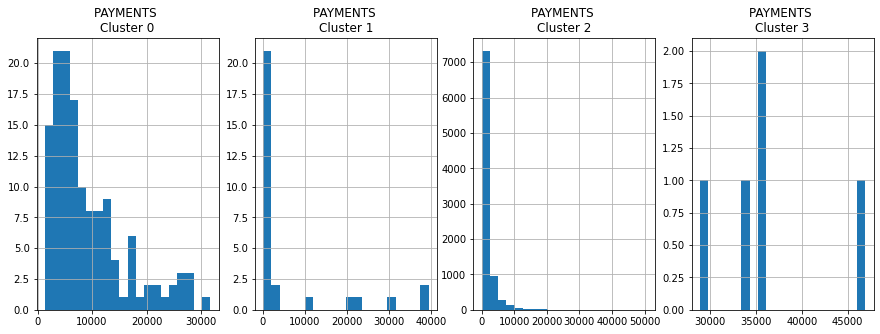

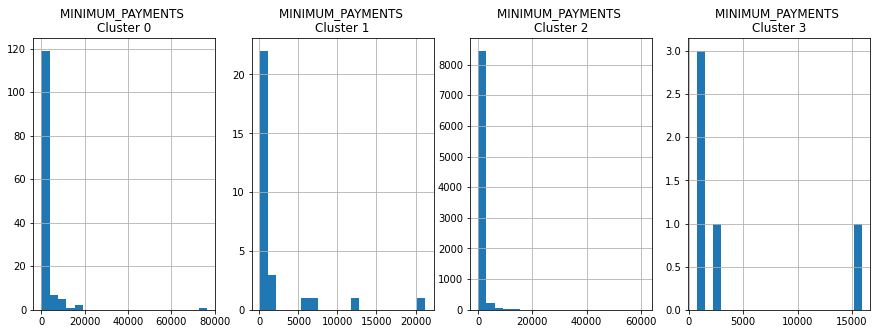

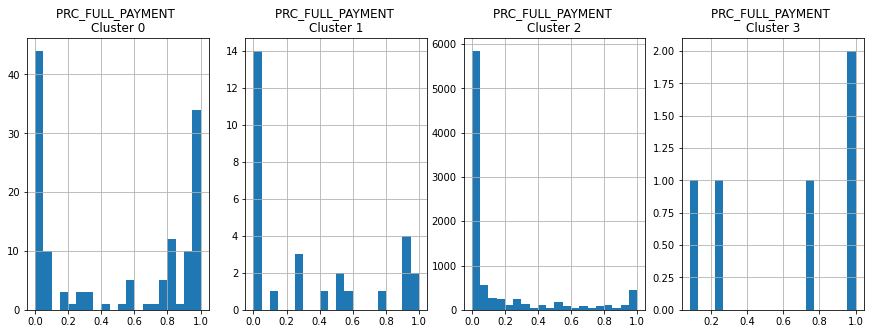

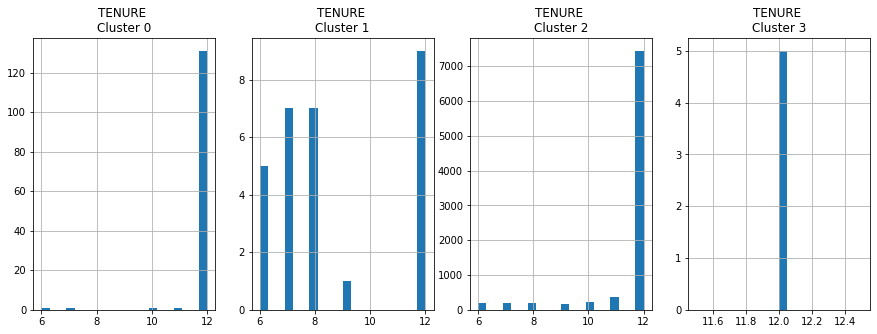

In [74]:
for i in df.columns:
  plt.figure(figsize=(15,5))
  for j in range(4):
    plt.subplot(1, 4, j + 1)
    cluster = Final_cluster[Final_cluster['BIRCH_CLUSTER'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [75]:
#Using PCA to identify principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-0.48216436, -0.09765617],
       [-0.6085774 , -0.01937946],
       [ 0.30450697,  0.92094554],
       ...,
       [ 0.36038865, -0.42264684],
       [-0.64609505, -0.20433243],
       [-0.09459773,  0.39957787]])

In [76]:
pca_df2 = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
#pca_df2.head()

In [77]:
#Using function Concat to Identify clients CLusters according PCA
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'BIRCH_CLUSTER': labels_Birch})], axis = 1)
pca_df2.head()

,pca1,pca2,BIRCH_CLUSTER
0,-0.482164,-0.097656,2
1,-0.608577,-0.019379,2
2,0.304507,0.920946,2
3,-0.588622,-0.005605,2
4,-0.554354,0.052965,2


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

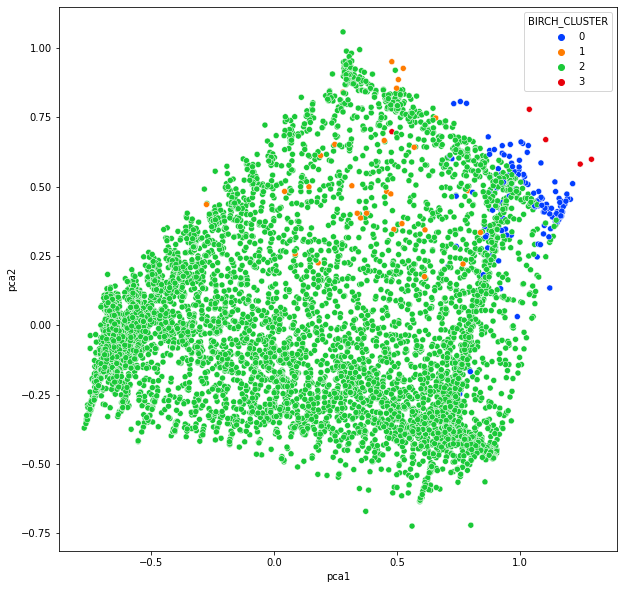

In [78]:
#Plot To visualize the Cluster distribuition
plt.figure(figsize=(10,10))
plt.legend(labels_Birch)
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'BIRCH_CLUSTER', data = pca_df2, palette = 'bright')

### III.3.-Clustering based on Birch

In [79]:
Cluster1 = [0]
Cluster2 = [1]
Cluster3 = [2]
Cluster4 = [3]
GroupMarketingB1 = Final_cluster[(Final_cluster['BIRCH_CLUSTER'].isin(Cluster1))]
GroupMarketingB2 = Final_cluster[(Final_cluster['BIRCH_CLUSTER'].isin(Cluster2))]
GroupMarketingB3 = Final_cluster[(Final_cluster['BIRCH_CLUSTER'].isin(Cluster3))]
GroupMarketingB4 = Final_cluster[(Final_cluster['BIRCH_CLUSTER'].isin(Cluster4))]

In [80]:
GroupMarketingB1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BIRCH_CLUSTER
6,627.260806,1.0,7091.01,6402.63,688.38,0.000000,1.0,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.00,12,0
120,8504.876253,1.0,6724.26,4100.08,2624.18,1686.599777,1.0,0.916667,1.000000,0.500000,10,85,17000.0,1888.756861,2167.446204,0.00,12,0
138,19043.138560,1.0,22009.92,9449.07,12560.85,0.000000,1.0,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.00,12,0
153,13673.079610,1.0,9792.23,3959.81,5832.42,2444.445738,1.0,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.00,12,0
171,975.942008,1.0,10221.35,7141.38,3079.97,1620.685551,1.0,1.000000,0.833333,0.583333,18,130,10500.0,10693.495850,347.641073,0.75,12,0


In [81]:
GroupMarketingB2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BIRCH_CLUSTER
85,134.917202,1.000000,1247.80,1247.80,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,22,16500.0,1275.229436,171.357189,1.000000,12,1
454,1207.888199,0.875000,1342.36,1037.96,304.40,1738.109478,0.875000,0.875000,0.500000,0.250000,2,27,4000.0,288.883026,312.026316,0.000000,8,1
759,756.041971,0.875000,2486.10,2052.75,433.35,0.000000,0.875000,0.875000,0.500000,0.000000,0,33,4000.0,948.092359,1356.087629,0.000000,8,1
1560,2774.249582,1.000000,21802.60,21802.60,0.00,1771.824164,1.000000,1.000000,0.000000,0.083333,4,72,13000.0,22350.292470,562.887574,0.916667,12,1
1669,165.808096,0.714286,981.19,823.39,157.80,0.000000,0.714286,0.571429,0.285714,0.000000,0,16,9000.0,672.446893,105.350665,0.250000,7,1


In [82]:
GroupMarketingB3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BIRCH_CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [83]:
GroupMarketingB4.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BIRCH_CLUSTER
501,13479.288210,1.0,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12,3
550,11547.520010,1.0,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12,3
1256,4010.621974,1.0,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0,33994.72785,703.503256,1.000000,12,3
1604,3391.702180,1.0,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.62593,716.027656,1.000000,12,3
3937,2997.977825,1.0,35131.16,34087.73,1043.43,0.000000,1.000000,1.000000,0.833333,0.000000,0,344,12000.0,28896.66522,767.014180,0.750000,12,3


In [84]:
e = len(GroupMarketingB1.index)
f = len(GroupMarketingB2.index)
g = len(GroupMarketingB3.index)
h = len(GroupMarketingB4.index)

### III.4.-Table Of Birch Clustering

In [85]:
Clients = ['Cluster 1','Cluster 2', 'Cluster 3','Cluster 4']
Marketing_ClientsB = [e, f, g, h ]

allResults= pd.DataFrame()
allResults['Marketing Group'] = Clients
allResults['BIRCH Clients'] = Marketing_ClientsB
allResults

,Marketing Group,BIRCH Clients
0,Cluster 1,135
1,Cluster 2,29
2,Cluster 3,8781
3,Cluster 4,5
